# Object Detection in colab : Training

##1 . Check out : GPU

In [19]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-fb0ebeef-d550-46b4-3a8b-b1eee0351bec)


##2. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##3. Unzip picture_data
(for train&test)

In [ ]:
# 5. /content/drive/MyDrive 밑에 yolo_custom_model_Training3라는 폴더를 생성합니다.
%cd /content/drive/MyDrive
!mkdir yolo_custom_model_Training4

/content/drive/MyDrive
mkdir: cannot create directory ‘yolo_custom_model_Training4’: File exists


In [23]:
# 6.  /content/drive/MyDrive/ yolo_custom_model_Training3 밑에 custom_data.zip 파일을 올리고 다음과 같이 잘 올라갔는지 확인해봅니다. 

!ls '/content/drive/MyDrive/yolo_custom_model_Training4'

custom_data.zip  darknet  training_yolo_custom_object_detection_files-main
custom_weight	 test


In [24]:
# 7. /content/drive/MyDrive/yolo_custom_model_Training3 디렉토리로 이동하여 custom_data 폴더를 생성합니다.
%cd /content/drive/MyDrive/yolo_custom_model_Training4
!mkdir custom_data

/content/drive/MyDrive/yolo_custom_model_Training4


In [25]:
# 8. /content/drive/MyDrive/yolo_custom_model_Training3/custom_data 폴더 밑에 압축을 풉니다.
!unzip '/content/drive/MyDrive/yolo_custom_model_Training4/custom_data.zip' -d '/content/drive/MyDrive/yolo_custom_model_Training4/custom_data'

Archive:  /content/drive/MyDrive/yolo_custom_model_Training4/custom_data.zip
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/798.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/798.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/799.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/799.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/800.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/800.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/classes.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/1.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/1.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/2.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/c

##4. Get AlexeyAB/darknet
(github opensource)


In [26]:
%pwd

'/content/drive/My Drive/yolo_custom_model_Training4'

In [ ]:
# 10. 다크넷을 다운로드 받습니다.
# download dataset in current directory(above path)
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/yolo_custom_model_Training3/darknet'

Cloning into '/content/drive/MyDrive/yolo_custom_model_Training3/darknet'...
remote: Enumerating objects: 15313, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15313 (delta 0), reused 1 (delta 0), pack-reused 15308
Receiving objects: 100% (15313/15313), 13.72 MiB | 6.00 MiB/s, done.
Resolving deltas: 100% (10402/10402), done.
Checking out files: 100% (2044/2044), done.


In [27]:
# 11. 다운받은 다크넷이 있는 폴더로 이동합니다.
# move current directory to darknet
%cd /content/drive/MyDrive/yolo_custom_model_Training4/darknet

/content/drive/MyDrive/yolo_custom_model_Training4/darknet


In [28]:
# 12. Makefile 의 내용을 수정합니다. 
# change setting values in 'Makefile' file 
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

# OPENCV=0 을 OPENCV = 1로 바꾸겠다. 

In [29]:
# 13. 수정된 make 파일을 실행하여 환경설정을 합니다.
# Compile model
"""  take care do not disconnect : file directory may be interupted 
if your network down during compile, I recommend delete darknet folder and restart number 4(get AlexeyAB/darknet)"""

!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [30]:
# 14. darknet 을 적용합니다. / usage: darknet/darknet <function> 뜨면 잘된것 
%cd ..
!darknet/darknet

/content/drive/MyDrive/yolo_custom_model_Training4
usage: darknet/darknet <function>


##5. Create Train&Test dataset

In [ ]:
# 15. 다음의 github 주소에서 사물검출에 필요한 코드들을 다운로드 받습니다
!git clone 'https://github.com/jakkcoder/training_yolo_custom_object_detection_files' '/content/drive/MyDrive/yolo_custom_model_Training3/training_yolo_custom_object_detection_files-main'

Cloning into '/content/drive/MyDrive/yolo_custom_model_Training3/training_yolo_custom_object_detection_files-main'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [31]:
# 16. 코드를 다운로드 받은 경로로 이동합니다.
%cd /content/drive/MyDrive/yolo_custom_model_Training4/training_yolo_custom_object_detection_files-main

/content/drive/MyDrive/yolo_custom_model_Training4/training_yolo_custom_object_detection_files-main


In [32]:
# 17. ls 를 수행하여 아래와 같이 4개의 파일이 존재하는지 확인합니다.      / py 파일 2개 / ipynb 2개
# check out current dir files
!ls

 creating-files-data-and-name.py
 creating-train-and-test-txt-files.py
'Custom Object detection live video.ipynb'
 Rename_files.ipynb


In [33]:
# 18. 훈련과 테스트로 데이터를 분리하는 파이썬 파일 2개를 우리가 만든 이미지와 정답이 있는 디렉토리로 복사합니다.
# copy creating-train-and-test-txt-files.py & creating-files-data-and-name.py
"""creating-train-and-test-txt-files.py >> create 'train.txt' & 'test.txt' files
   creating-files-data-and-name.py >> create label 'labelled_data.data' file
   <if you excute both .py files, you get mentioned files upper lines 2,3>"""

!cp creating-train-and-test-txt-files.py /content/drive/MyDrive/yolo_custom_model_Training4//custom_data
!cp creating-files-data-and-name.py /content/drive/MyDrive/yolo_custom_model_Training4/custom_data

In [34]:
# 19. 학습할 이미지가 있는 디렉토리로 이동합니다.
%cd /content/drive/MyDrive/yolo_custom_model_Training4/custom_data

/content/drive/MyDrive/yolo_custom_model_Training4/custom_data


In [35]:
# 20. 2개의 파이썬 코드의 내용을수정합니다.
# change paths in both .py files

!sed -i '39 s@/home/my_name/Downloads/video-to-annotate@custom_data@' creating-train-and-test-txt-files.py
!sed -i '74 s@jpeg@jpg@' creating-train-and-test-txt-files.py
!sed -i '36 s@/home/my_name/Downloads/video-to-annotate@custom_data@' creating-files-data-and-name.py

In [36]:
# 21. 상위 디렉토리로 이동합니다.
# move current dir one step before
%cd ..

/content/drive/My Drive/yolo_custom_model_Training4


In [37]:
# 22. creating-train-and-test-txt-files.py 를 수행하여 훈련 데이터들(train.txt)과 테스트 데이터(test.txt)들의 목록을 생성합니다. 
# 훈련 데이터의 명단과 테스트 데이터의 명단을 만드는 작업
# excute .py file >> 'train.txt', 'test.txt'   
!python custom_data/creating-train-and-test-txt-files.py

In [38]:
# 23. 정답 데이터(컨버스와 뉴발란스)를 생성합니다.
# excute .py file >> 'labelled_data.data'
!python custom_data/creating-files-data-and-name.py

##6. Setting diretory & values
(yolov4.conv.137 & yolov4_custom.cfg)
# 구글에서 yolov4.conv.137로 검색을 하고 모델을 다운로드 받아 /content/drive/MyDrive/yolo_custom_model_Training3 에 올립니다.

###6.1 pre-trained model

In [ ]:
# 24. 학습 시킨후의 가중치를 저장할 custom_weight 폴더를 생성합니다.
# create directory 'custom_weight'
!mkdir custom_weight

In [ ]:
# 25. 현재 디렉토리를 확인합니다.
%pwd

'/content/drive/MyDrive/yolo_custom_model_Training3'

In [ ]:
# 26. 현재 디렉토리의 목록들을 확인합니다.
%ls -l

total 167452
drwx------  2 root root      4096 Sep 29 01:30 custom_data/
-rw-------  1 root root   1415098 Sep 29 01:11 custom_data.zip
drwx------  2 root root      4096 Sep 29 01:57 custom_weight/
drwx------ 16 root root      4096 Sep 29 01:17 darknet/
drwx------  3 root root      4096 Sep 29 01:22 training_yolo_custom_object_detection_files-main/
-rw-------  1 root root 170038676 Sep 29 01:49 yolov4.conv.137


In [ ]:
# 28. yolov4.conv.137 모델을 custom_weight 밑에 이동합니다. 
# yolo 모델을 custom_weight로 이동
# move 'yolov4.conv.137' file to 'custom_weight' dir
!mv yolov4.conv.137 custom_weight/

###6.2 change values

In [39]:
# 29. /content/drive/MyDrive/yolo_custom_model_Training3/darknet/cfg 밑으로 이동합니다.
%cd /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg

/content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg


In [40]:
# 30. yolov4.cfg를  yolov4_custom.cfg 로 복사합니다.
# yolo 환경설정파일을 복사합니다.

!cp yolov4.cfg yolov4_custom.cfg

In [41]:
# 31. 학습중 메모리 초과로 학습이 중단되는것을 막기 위해 다음과 같이 배치 사이즈를 조정합니다. 
# 욜로 다크넷 모델을 학습시킬때 사용하는 환경설정 파일을 변경합니다.
# 아래의 변경작업을 하지 않으면 메모리가 full이 되서 더이상 학습이 안되는 경우가 종종 생긴다.
# 학습할때 메모리 초과오류를 방지하려면 배치 사이즈를 조정해야 합니다.
# change values for training

!sed -i '2 s@batch=64@batch=8@' yolov4_custom.cfg

!sed -i '7 s@width=608@width=416@' yolov4_custom.cfg
!sed -i '8 s@height=608@height=416@' yolov4_custom.cfg  

!sed -i '19 s@500500@60000@' yolov4_custom.cfg  #maxbatch=class*2000 = 4000     / class 2개니까        / class 수정시에 고쳐주면됨
!sed -i '21 s@400000,450000@48000,54000@' yolov4_custom.cfg  #maxbatch*0.8 = 3200, maxbatch*0.9 = 3600             / class 수정시에 고쳐주면됨

!sed -i '968 s@classes=80@classes=30@' yolov4_custom.cfg            # class = 클래스의 갯수  / class 수정시에 고쳐주면됨
!sed -i '1056 s@classes=80@classes=30@' yolov4_custom.cfg              # class = 클래스의 갯수  / class 수정시에 고쳐주면됨
!sed -i '1144 s@classes=80@classes=30@' yolov4_custom.cfg               # class = 클래스의 갯수  / class 수정시에 고쳐주면됨

!sed -i '961 s@filters=255@filters=105@' yolov4_custom.cfg  #filters=(4+1+classes)*3 = 21   / class 수정시에 고쳐주면됨
!sed -i '1049 s@filters=255@filters=105@' yolov4_custom.cfg    #filters=(4+1+classes)*3 = 21   / class 수정시에 고쳐주면됨
!sed -i '1137 s@filters=255@filters=105@' yolov4_custom.cfg          #filters=(4+1+classes)*3 = 21   / class 수정시에 고쳐주면됨

###6.3 create back dir

In [42]:
# 32./content/drive/MyDrive/yolo_custom_model_Training3 로 이동합니다.
%cd /content/drive/MyDrive/yolo_custom_model_Training4

/content/drive/MyDrive/yolo_custom_model_Training4


In [43]:
# 33. 학습될 가중치를 저장할 backup 이라는 폴더를 생성합니다.
# backup 폴더에 우리가 직접 라벨링한 사진들로 학습한 모델의 가중치를 저장할 것입니다.
!mkdir backup

##7. Train the model 


In [44]:
# 34. /content/drive/MyDrive/yolo_custom_model_Training3 로 이동합니다.
%cd /content/drive/MyDrive/yolo_custom_model_Training4

/content/drive/MyDrive/yolo_custom_model_Training4


In [45]:
# 35. 다크넷을 이용하여 학습 데이터들을 훈련 시킵니다.(1시간 정도 소요됨)
# 우리가 라벨링한 이미지로 학습시키는 명령어

!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov4_custom.cfg custom_weight/yolov4.conv.137 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.532050), count: 5, class_loss = 4.394241, iou_loss = 21.179853, total_loss = 25.574095 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000056, iou_loss = 0.000000, total_loss = 0.000056 
 total_bbox = 17813149, rewritten_bbox = 1.035718 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.650031), count: 57, class_loss = 57.801022, iou_loss = 507.001465, total_loss = 564.802490 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.640002), count: 30, class_loss = 23.782066, iou_loss = 64.671364, total_loss = 88.453430 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.483644), count: 3, class_loss = 4.034370, iou_loss = 0.784805, total_loss = 4.819175 
 total_bbox = 17813239, rewritten_bbox = 1.035713 % 
v

#Webcam object detection

##8. Check performance

In [2]:
# 36. 결과를 시각화 할 함수를 생성합니다.
# define helper function imShow
# 코랩에서 이미지를 시각화 하기 위해서 필요한 함수

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')


In [9]:
# 37. /content/drive/MyDrive/yolo_custom_model_Training3 로 이동합니다.

%cd /content/drive/MyDrive/yolo_custom_model_Training4
!ls

/content/drive/MyDrive/yolo_custom_model_Training4
backup			 custom_weight
chart.png		 darknet
chart_yolov4_custom.png  test
custom_data		 training_yolo_custom_object_detection_files-main
custom_data.zip


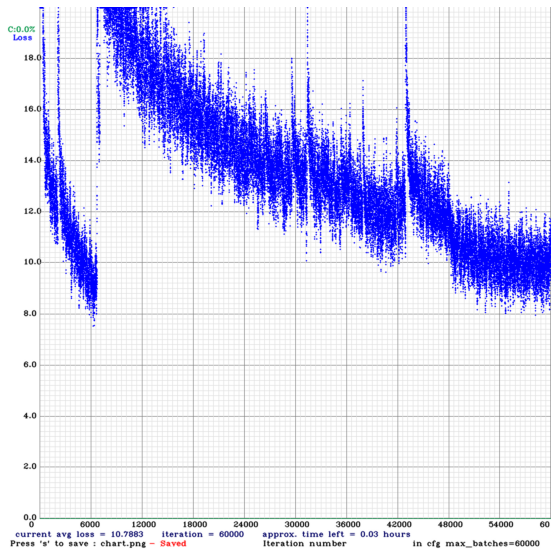

In [10]:
# 38. 학습결과를 확인합니다.
# only works if the training does not get interrupted 

imShow('chart.png')

In [4]:
# 39. test.txt 와 train.txt 와 labelled_data.data 의 내용을 수정합니다.
# 테스트 데이터와 훈련 데이터와 정답과 가중치에 대한 위치 정보와 각각의 text file 에 저장합니다.
%cd /content/drive/MyDrive/yolo_custom_model_Training4/custom_data

!sed -i 's@custom_data@/content/drive/MyDrive/yolo_custom_model_Training4/custom_data@' test.txt
!sed -i 's@custom_data@/content/drive/MyDrive/yolo_custom_model_Training4/custom_data@' train.txt

!sed -i 's@custom_data@/content/drive/MyDrive/yolo_custom_model_Training4/custom_data@' labelled_data.data
!sed -i '5 s@.*@backup = /content/drive/MyDrive/yolo_custom_model_Training4/backup/@' labelled_data.data

!cat labelled_data.data

/content/drive/MyDrive/yolo_custom_model_Training4/custom_data
classes = 30
train = /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/train.txt
valid = /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/test.txt
names = /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/classes.names
backup = /content/drive/MyDrive/yolo_custom_model_Training4/backup/

In [3]:
# 40. /content/drive/My Drive/yolo_custom_model_Training3/darknet 디렉토리에 실행권한을 추가합니다.
%cd /content/drive/My Drive/yolo_custom_model_Training4/darknet
!chmod +x ./darknet

/content/drive/My Drive/yolo_custom_model_Training4/darknet


##8.1 Check mAP

In [6]:
# 41. 각 클래스 별로 정확도를 확인합니다.
#You can check the mAP for all the saved weights to see which gives the best results

!./darknet detector map /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


##9. Test custom Object Detection

In [41]:
# 42. 한장의 사진을 테스트 하기 위해 배치사이즈를 1로 변경합니다.
#set your custom cfg to test mode 
%cd /content/drive/MyDrive/yolo_custom_model_Training4/
!sed -i 's/batch=64/batch=1/' yolov4_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4_custom.cfg
%cd ..

/content/drive/MyDrive/yolo_custom_model_Training4/keras-yolo4-master
/content/drive/My Drive/yolo_custom_model_Training4


In [8]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4/

/content/drive/MyDrive/yolo_custom_model_Training4


##9.1 Run detector on an image

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF

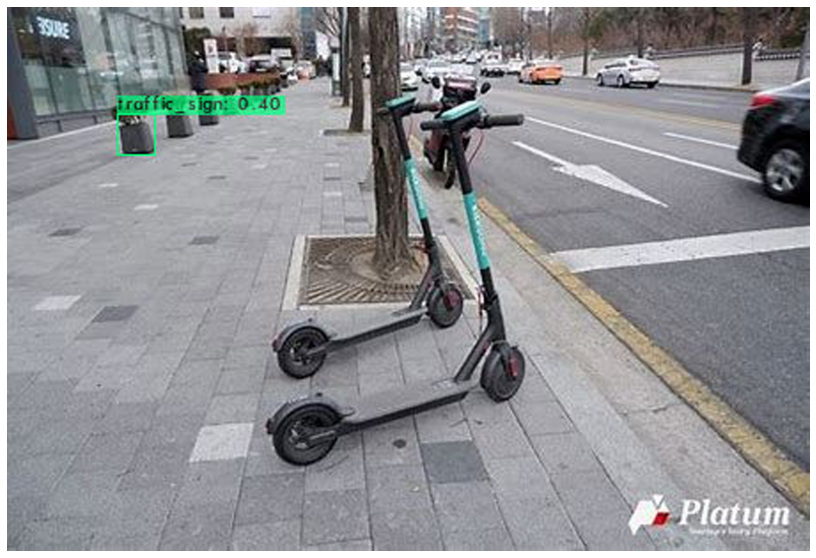

In [6]:
# 43. 인터넷에서 신발 2개가 하나의 사진에 있는 학습하지 않았던 새로운 이미지(shoes.png) 를 구해서 사물검출을 해봅니다.
# shoes.png 홈페이지에서 다운받아서 /yolo_custom_model_Training3 에 넣어준다.
# 사람이 신은 뉴발이나 컨버스 사진올려서 실험도 해보자
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4-custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_last.weights /content/drive/MyDrive/yolo_custom_model_Training4/test/test11.jpg -thresh 0.3
imShow('predictions.jpg')

In [45]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4/keras-yolo4-master

/content/drive/MyDrive/yolo_custom_model_Training4/keras-yolo4-master


In [48]:
!python ./convert.py ./yolov4_custom.cfg ./yolov4_custom_final.weights ./yolo_model.h5

2021-10-15 02:50:49.590276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 02:50:49.598740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 02:50:49.599412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 02:50:49.600375: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

'/content/drive/My Drive/yolo_custom_model_Training4'

## 9.2 Run detector on a webcam image

<IPython.core.display.Javascript object>

Saved to photo.jpg


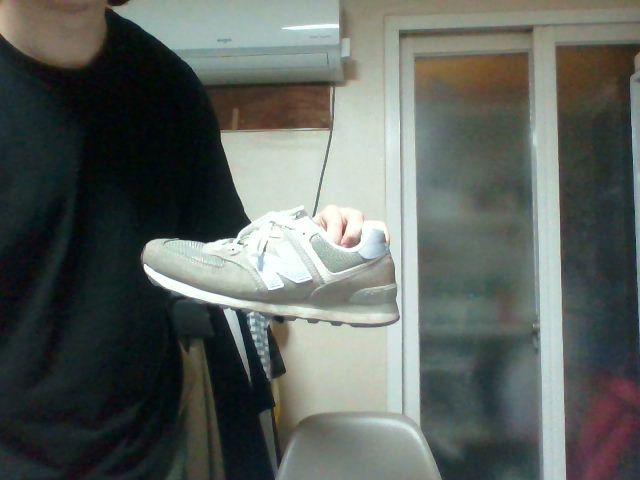

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


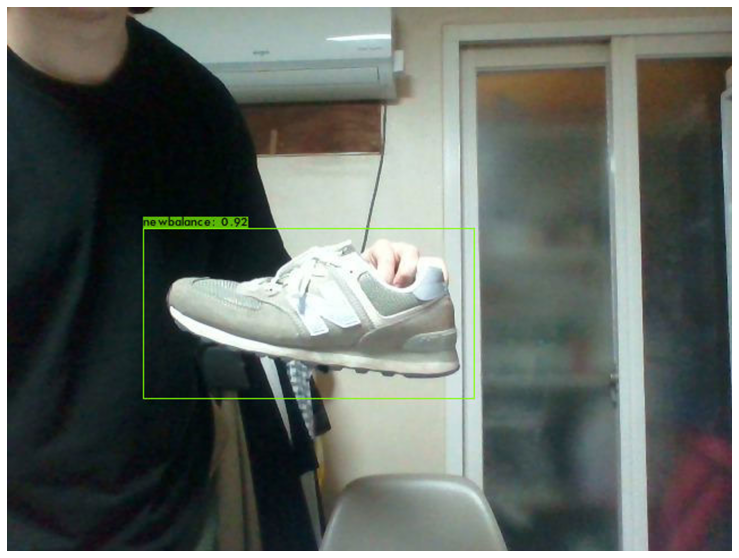

In [ ]:
# 44. 이어서 실시간으로 확인해봅니다.
#Run detector on images captured by webcam for your custom YOLOv4-tiny trained model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

!./darknet detector test /content/drive/MyDrive/yolo_custom_model_Training3/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training3/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training3/backup/yolov4_custom_final.weights photo.jpg -thresh 0.5
imShow('predictions.jpg')   

## 9.3 Run detector on a video

In [ ]:
# run your custom detector on a video with this command (upload a video to your google drive to test, the thresh flag sets the minimum accuracy required for object detection).This saves the output video with the detections in your output path

#!./darknet detector demo data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -dont_show /mydrive/mask_test_videos/test3.mp4 -i 0 -out_filename /mydrive/mask_test_videos/result.avi 

## 9.4 Run detector on a live webcam

In [ ]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
#adjusted for my custom YOLOv4-tiny trained weights, config and obj.data files

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline


# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("/content/drive/MyDrive/yolo_custom_model_Training3/darknet/cfg/yolov4_custom.cfg", 
                                                  "/content/drive/MyDrive/yolo_custom_model_Training3/custom_data/labelled_data.data", 
                                                  "/content/drive/MyDrive/yolo_custom_model_Training3/backup/yolov4_custom_final.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes  

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes   

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [20]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 959 kB/s 


In [ ]:
tensorflowjs_converter --input_format keras /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_last.weights/my_model.h5 path/to/tfjs_target_dir